# 13517026 - Ahmad Mutawalli
# 13517098 - Anzaldi Sulaiman Oemar

In [18]:
from scipy import stats as st
from scipy import special as scpysp
import warnings
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm

# DATASET 1 --- FIFA

In [3]:
pd.read_csv('fifa.csv', delimiter = ',')

Name  Age          Nationality
0                  L. Messi   31            Argentina
1         Cristiano Ronaldo   33             Portugal
2                 Neymar Jr   26               Brazil
3                    De Gea   27                Spain
4              K. De Bruyne   27              Belgium
5                 E. Hazard   27              Belgium
6                 L. Modrić   32              Croatia
7                 L. Suárez   31              Uruguay
8              Sergio Ramos   32                Spain
9                  J. Oblak   25             Slovenia
10           R. Lewandowski   29               Poland
11                 T. Kroos   28              Germany
12                 D. Godín   32              Uruguay
13              David Silva   32                Spain
14                 N. Kanté   27               France
15                P. Dybala   24            Argentina
16                  H. Kane   24              England
17             A. Griezmann   27               France
18            M. ter Stegen   26              Germany
19              T. Courtois   26              Belgium
20          Sergio Busquets   29                Spain
21                E. Cavani   31              Uruguay
22                 M. Neuer   32              Germany
23                S. Agüero   30            Argentina
24             G. Chiellini   33                Italy
25                K. Mbappé   19               France
26                 M. Salah   26                Egypt
27                 Casemiro   26               Brazil
28             J. Rodríguez   26             Colombia
29               L. Insigne   27                Italy
...                     ...  ...                  ...
18177             R. Roache   18  Republic of Ireland
18178          L. Wahlstedt   18               Sweden
18179           J. Williams   17              England
18180              M. Hurst   22             Scotland
18181              C. Maher   17  Republic of Ireland
18182               Y. Góez   18             Colombia
18183         K. Pilkington   44              England
18184             D. Horton   18              England
18185              E. Tweed   19  Republic of Ireland
18186          Zhang Yufeng   20             China PR
18187             C. Ehlich   19              Germany
18188            L. Collins   17                Wales
18189            A. Kaltner   18              Germany
18190            L. Watkins   18              England
18191  J. Norville-Williams   18              England
18192             S. Squire   18              England
18193            N. Fuentes   18                Chile
18194              J. Milli   18                Italy
18195            S. Griffin   18  Republic of Ireland
18196           K. Fujikawa   19                Japan
18197            D. Holland   18  Republic of Ireland
18198            J. Livesey   18              England
18199          M. Baldisimo   18               Canada
18200              J. Young   18             Scotland
18201              D. Walsh   18  Republic of Ireland
18202          J. Lundstram   19              England
18203    N. Christoffersson   19               Sweden
18204             B. Worman   16              England
18205        D. Walker-Rice   17              England
18206             G. Nugent   16              England

[18207 rows x 3 columns]

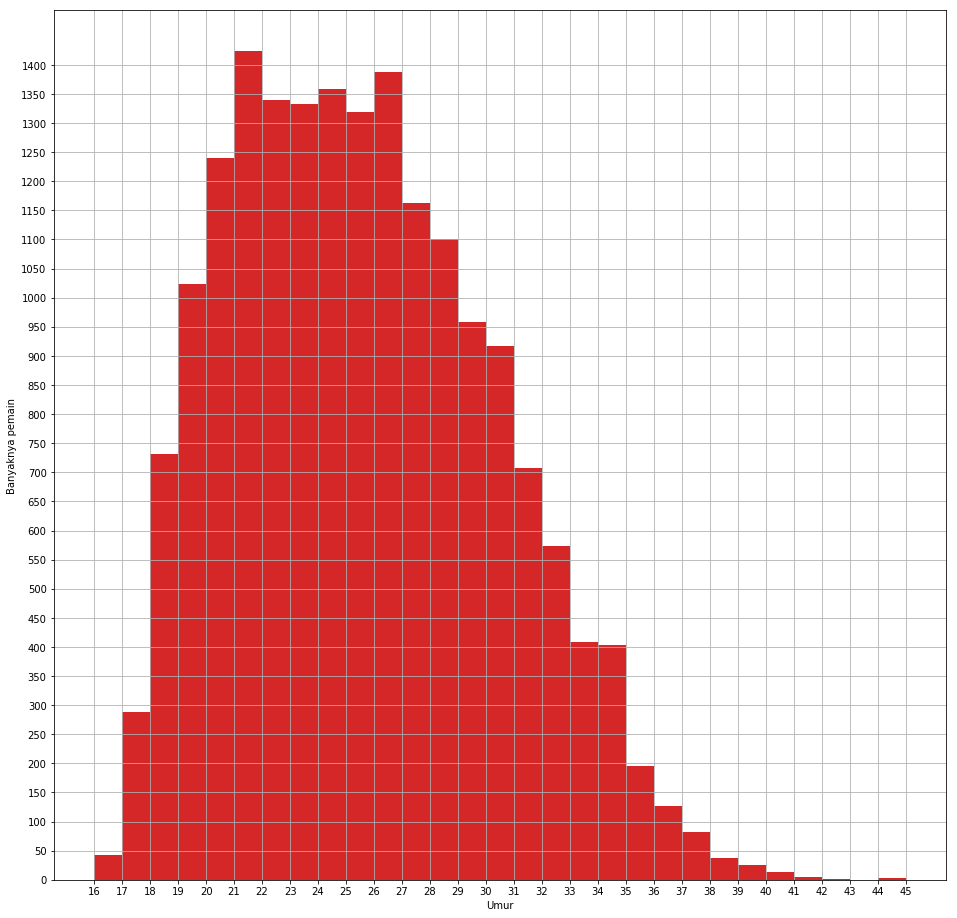

In [4]:
data_01 = pd.read_csv('fifa.csv', delimiter = ',')

umur = data_01["Age"]
umur.hist(bins = 29, figsize = [16,16]).set_xlabel("Umur")
umur.hist(bins = 29, figsize = [16,16]).set_ylabel("Banyaknya pemain")
umur.hist(bins = 29, figsize = [16,16]).set_xticks(range(16,46))
umur.hist(bins = 29, figsize = [16,16]).set_yticks(range(0,1450,50))

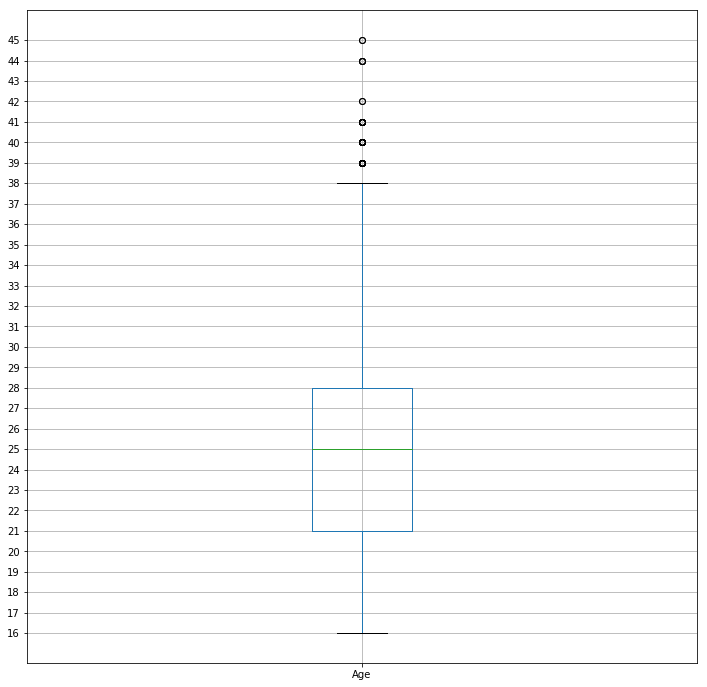

In [5]:
data_01.boxplot(figsize = [12,12])
data_01.boxplot(figsize = [12,12]).set_yticks(range(16,46))

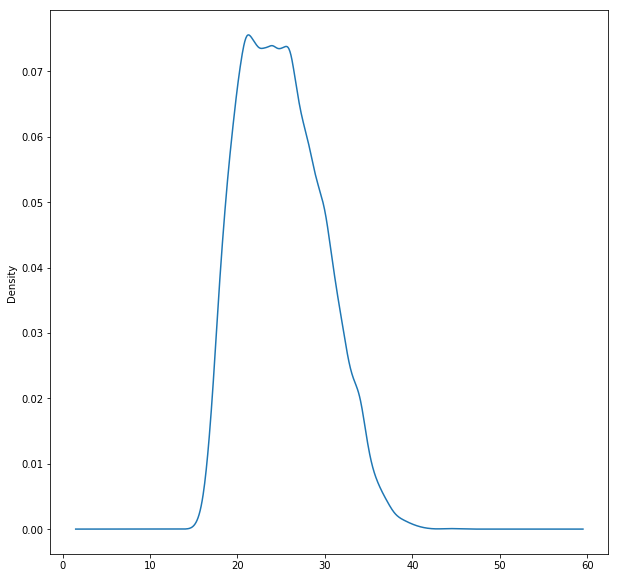

In [6]:
umur.plot(kind = "kde", figsize = [10, 10])

Bentuk grafik di atas menyerupai distribusi normal, maka akan digunakan distribusi normal.

In [7]:
umur.describe()

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

In [8]:
umur.value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

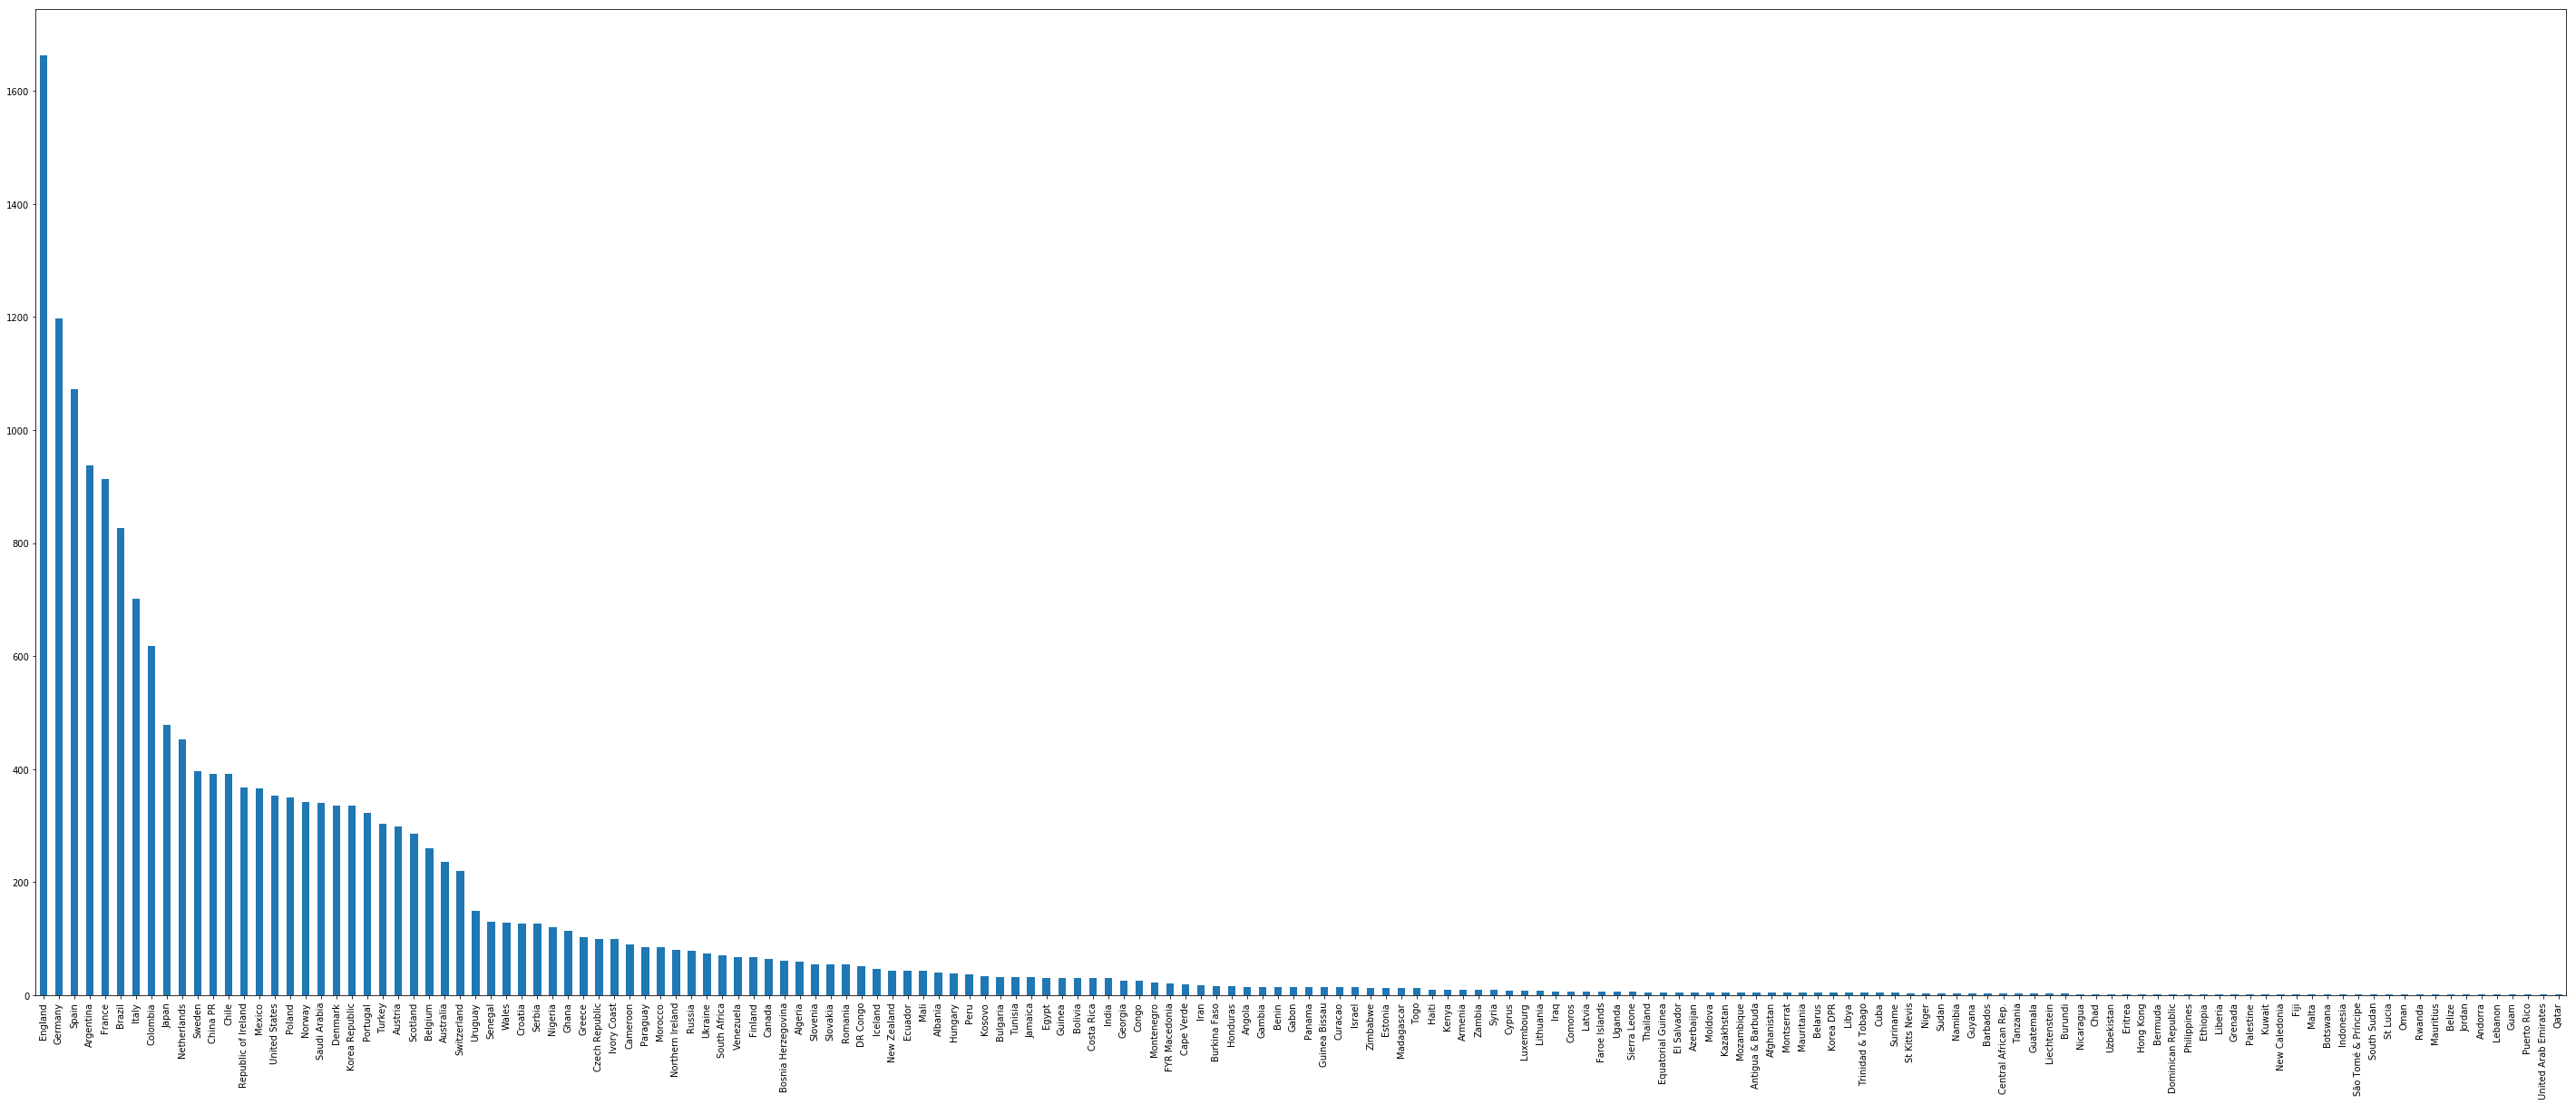

In [9]:
negara = data_01["Nationality"]
negara.value_counts().plot(kind = "bar", figsize = [50, 20])

In [10]:
mix = data_01[["Age", "Nationality"]]
mix.mode()

Age Nationality
0   21     England

In [11]:
data_01.var(axis = 0, skipna = True)

Age    21.808365
dtype: float64

In [12]:
data_01.skew(axis = 0, skipna = True)

Age    0.391764
dtype: float64

In [13]:
data_01.kurt(axis = 0, skipna = True)

Age   -0.459514
dtype: float64

In [14]:
umur.mean()

25.122205745043114

Fungsi distribusi peluang yang sesuai adalah hipergeometrik karena Tsubasa akan menambahkan pemain dari dataframe yang sudah ada.

In [15]:
#Berumur kurang dari 22 tahun

sum = 0
T = umur.unique().tolist()

for _umur in T:
    if (_umur < 22):
        sum = float(sum) + float((umur == _umur).sum()/(umur == _umur).count())

int(sum * 1000)

260

In [16]:
#Berumur lebih dari 40 tahun

sum = 0
T = umur.unique().tolist()

for _umur in T:
    if (_umur > 40):
        sum = float(sum) + float((umur == _umur).sum()/(umur == _umur).count())

int(sum * 1000)

0

# DATASET 3 --- BLACK FRIDAY

In [25]:
dataset3 = pd.read_csv('black_friday.csv', header = None)
dataset3

0
0        8370
1       15200
2        1422
3        1057
4        7969
5       15227
6       19215
7       15854
8       15686
9        7871
10       5254
11       3957
12       6073
13      15665
14       5378
15       2079
16      13055
17       8851
18      11788
19      19614
20       8584
21       9872
22       9743
23       5982
24      11927
25      16662
26       5887
27       6973
28       5391
29      16352
...       ...
537547  11543
537548  20924
537549  13082
537550  11658
537551   6863
537552  16415
537553  18526
537554   7099
537555    578
537556   2183
537557  12724
537558   7796
537559   7770
537560   5940
537561   7834
537562  11508
537563   6074
537564   7084
537565   7934
537566   5350
537567   1994
537568   5930
537569   7042
537570  15491
537571  11852
537572  11664
537573  19196
537574   8043
537575   7172
537576   6875

[537577 rows x 1 columns]

In [26]:
dataset3.describe()

0
count  537577.000000
mean     9333.859853
std      4981.022133
min       185.000000
25%      5866.000000
50%      8062.000000
75%     12073.000000
max     23961.000000

In [27]:
dataset3.mode()

0
0  6855

In [28]:
dataset3.var()

0    2.481058e+07
dtype: float64

In [29]:
dataset3.std()

0    4981.022133
dtype: float64

In [30]:
dataset3.skew()

0    0.62428
dtype: float64

In [31]:
dataset3.kurtosis()

0   -0.343121
dtype: float64

In [32]:
bin_size3 = 15

dataset3.plot.hist(bins=bin_size3)

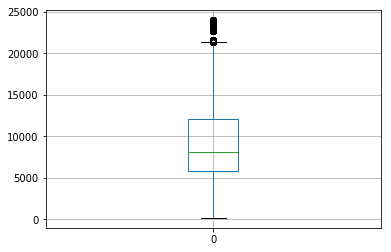

In [33]:
dataset3.boxplot()

a. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang:

i. Miskin (total pembelian kurang dari 1000 dolar)

In [34]:
length3 = len(dataset3)
miskin3 = round(len(dataset3.loc[dataset3[0] < 1000]) / length3 * 250)
miskin3

3

In [36]:
kaya3 = round(len(dataset3.loc[dataset3[0] > 10000]) / length3 * 250)
kaya3

87

iii. Crazy Rich (total pembelian lebih dari 20000 dolar)

In [38]:
crazy_rich3 = round(len(dataset3.loc[dataset3[0] > 20000]) / length3 * 250)
crazy_rich3

6

b. Jika terdapat 1000 orang pembeli baru yang mengikuti BlackFriday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli:

i. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)

In [41]:
galaxy_ford3 = round(len(dataset3.loc[(dataset3[0] >= 1980) & (dataset3[0] <= 2000)]) / length3 * 1000)
galaxy_ford3

1

ii. MacBook Pro 2018 TouchBar 256GB + iPhoneXR + AirPods2(total pembelian di antara 2707–2897 dolar inklusif)

In [42]:
macbook3 = round(len(dataset3.loc[(dataset3[0] >= 2707) & (dataset3[0] <= 2897)]) / length3 * 1000)
macbook3

7

# DATASET 4 --- CRYPTOCURRENCY

In [17]:
data_04 = pd.read_csv('dataset_crypto.csv', header = None)
data_04

0
0       0.000015
1       0.000023
2       0.000033
3       0.000037
4       0.000037
5       0.000037
6       0.000036
7       0.000073
8       0.000072
9       0.000073
10      0.000067
11      0.000069
12      0.000082
13      0.000113
14      0.000111
15      0.000112
16      0.000124
17      0.000124
18      0.000113
19      0.000109
20      0.000098
21      0.000090
22      0.000086
23      0.000085
24      0.000085
25      0.000084
26      0.000082
27      0.000081
28      0.000060
29      0.000037
...          ...
632188  0.113194
632189  0.087992
632190  0.101825
632191  0.334725
632192  0.690254
632193  0.625767
632194  0.230924
632195  0.114744
632196  0.089624
632197  0.143865
632198  0.112651
632199  0.126489
632200  0.145279
632201  0.132727
632202  0.126085
632203  0.225772
632204  0.129094
632205  0.228046
632206  0.323451
632207  0.073590
632208  0.074413
632209  0.061524
632210  0.130473
632211  0.211989
632212  0.070326
632213  0.045676
632214  0.057948
632215  0.082787
632216  0.091944
632217  0.089511

[632218 rows x 1 columns]

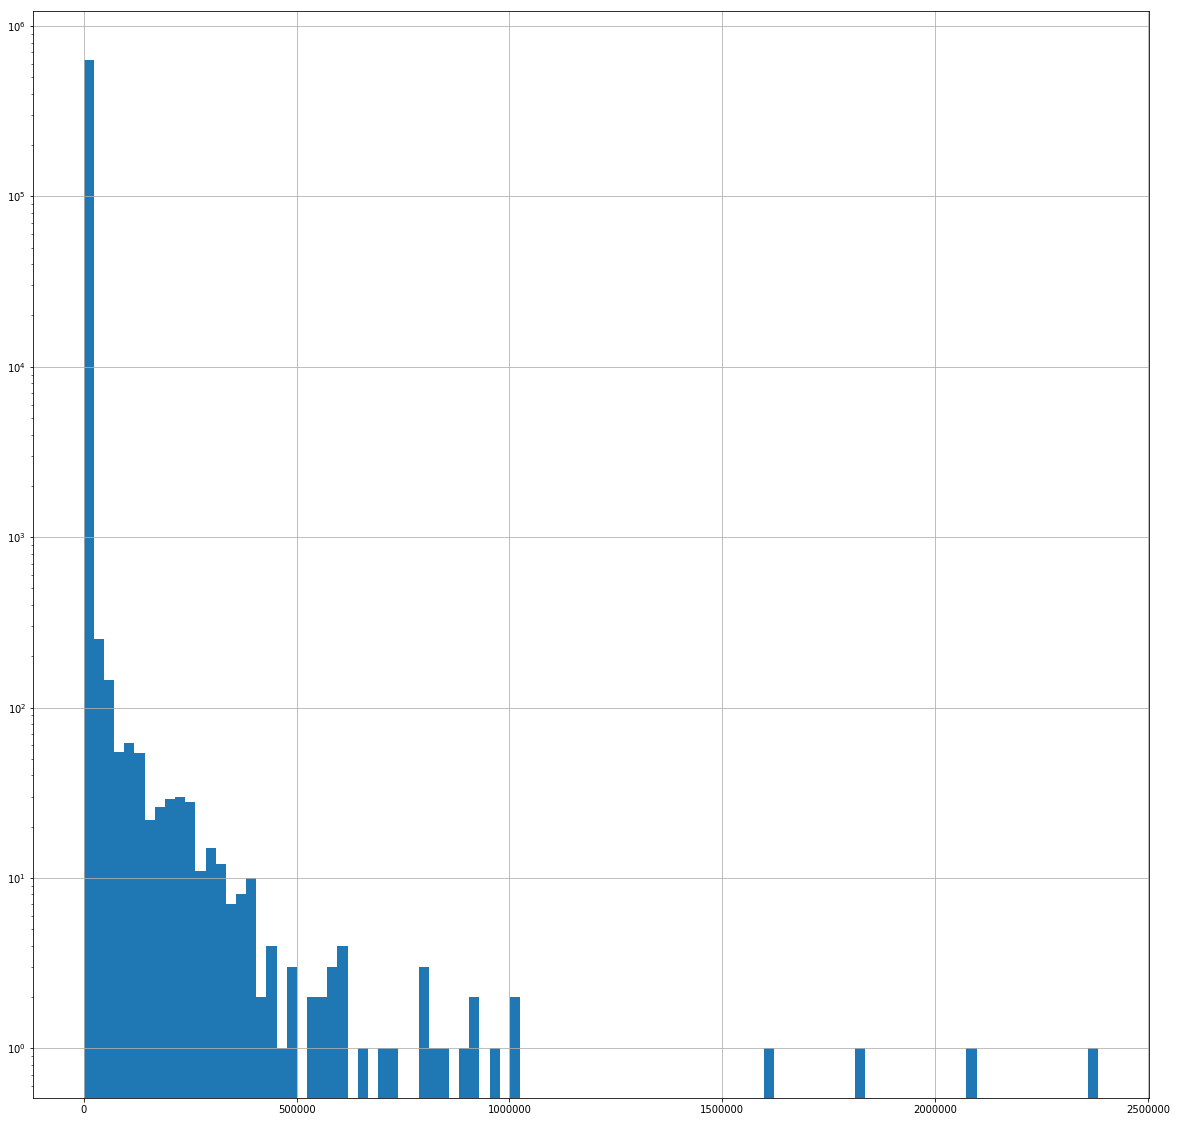

In [18]:
temp = data_04[0]
temp.hist(bins = 100, figsize = [20, 20], log = True)

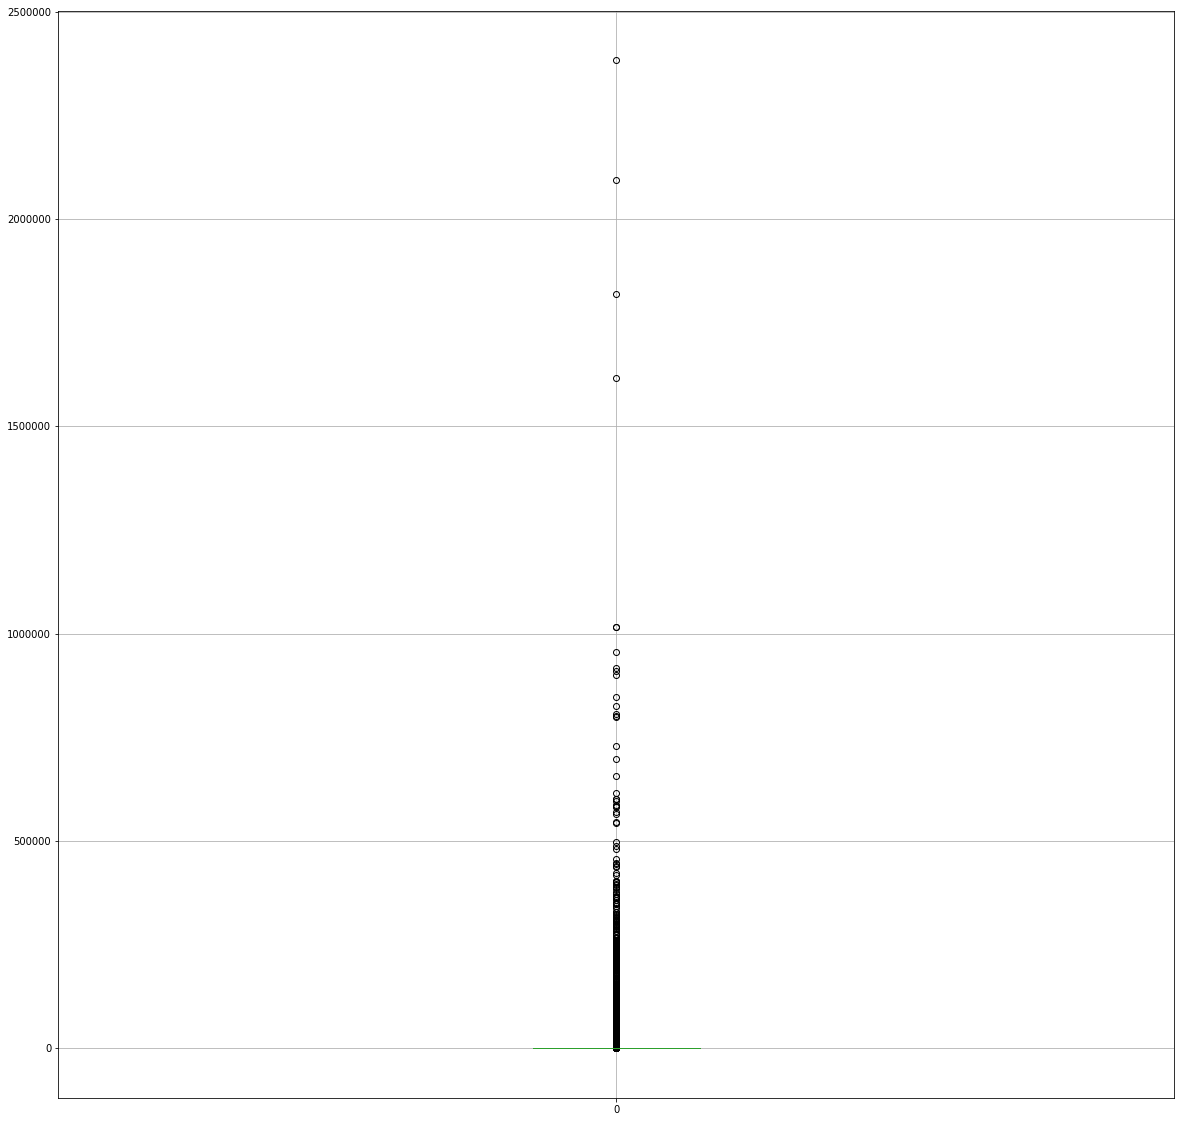

In [19]:
data_04.boxplot(figsize = [20,20])

In [20]:
data_04.describe()

0
count  6.322180e+05
mean   2.030181e+02
std    8.678734e+03
min    2.925000e-09
25%    8.070000e-04
50%    9.733500e-03
75%    1.198202e-01
max    2.383502e+06

In [21]:
temp.value_counts()

0.000002       1093
0.000004        900
0.000006        872
0.000005        736
0.000003        730
0.000009        532
0.000005        518
0.000007        506
0.000010        492
0.000003        475
0.000012        469
0.000008        399
0.000011        380
0.000005        377
0.000004        364
0.000003        359
0.000001        353
0.000010        330
0.000006        329
0.000010        324
0.000008        307
0.000013        298
0.000002        287
0.000003        279
0.000004        278
0.000018        274
0.000005        263
0.000017        259
0.000021        251
0.000011        245
               ... 
0.293856          1
0.604895          1
0.098677          1
0.033966          1
0.289075          1
0.345721          1
1143.000000       1
0.017317          1
0.247713          1
0.249381          1
0.025861          1
0.099833          1
0.078634          1
0.060032          1
0.046124          1
27.505000         1
0.248544          1
0.021339          1
0.204171          1


In [22]:
temp.var(axis = 0, skipna = True)

75320415.21219827

In [23]:
temp.skew(axis = 0, skipna = True)

118.23960755632972

In [24]:
temp.kurt(axis = 0, skipna = True)

22297.470842872517

Fungsi distribusi yang digunakan adalah distribusi Gamma karena data_04 yang ada tidak merata dengan variansi yang sangat besar.

In [25]:
alpha, zzz, beta = stats.gamma.fit(temp, loc = 0)
alpha, beta

(0.26838232070787427, 118.86394010199717)

In [26]:
#a.i. Kurang dari 0.177013

round(1000*(special.gammainc(alpha, 0.177*beta)))

1000.0

In [27]:
#a.ii. Lebih dari 177.013

1000*(1-special.gammainc(alpha, 177.013*beta))

0.0

In [28]:
#b.i. Lebih dari 0.013

1 - special.gammainc(alpha, 0.013*beta)

0.034378807799275934

In [29]:
#b.ii. Kurang dari 17.7

special.gammainc(alpha, 17.7*beta)

1.0

# DATASET 5 --- ATHLETES

In [3]:
dataset4 = pd.read_csv('athletes.csv')
dataset4.head()

Name  Medal
0                 A Dijiang      0
1                  A Lamusi      0
2  A. Aanantha Sambu Mayavo      0
3           A. Abdul Razzak      0
4                   A. Brun      0

In [4]:
dataset4["Medal"].describe()

count    134731.000000
mean          0.295277
std           0.724716
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: Medal, dtype: float64

In [5]:
dataset4["Medal"].mode()

0    0
dtype: int64

In [6]:
dataset4["Medal"].skew()

4.8199987845312

In [7]:
dataset4["Medal"].kurtosis()

51.562525836059855

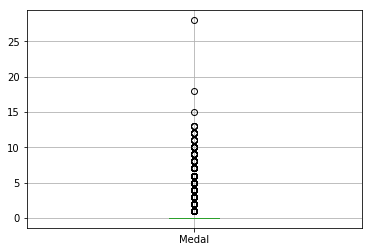

In [8]:
dataset4.boxplot()

In [9]:
def best_fit_distribution(data, bins=200, ax=None):
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    DISTRIBUTIONS = [st.beta, st.chisquare, st.gamma, st.lognorm]
    
    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    
    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [11]:
best_fit_name4, best_fit_params4 = best_fit_distribution(dataset4["Medal"], 18)
best_dist4 = getattr(st, best_fit_name4)

best_fit_name4

'gamma'

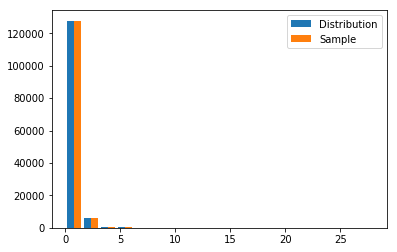

In [12]:
alpha4 = 0.166
beta4 = 1.778
x_gamma4 = pd.DataFrame(np.random.gamma(alpha4,beta4,len(dataset4.index)))
plt.hist([x_gamma4[0].round(),dataset4.Medal],bins=18,label=["Distribution","Sample"])
plt.legend(loc = 'upper right')
plt.show()

a. Peluang Y meraih

i. tepat 0 medali

In [13]:
scpysp.gammainc(alpha4,0.5*beta4)

0.9495457573649352

ii. lebih dari 10 medali

In [ ]:
1 - scpysp.gammainc(alpha4,10.5*beta4)

iii. tepat 3 medali

In [15]:
scpysp.gammainc(alpha4,3.5*beta4) - scpysp.gammainc(alpha4,2.5*beta4)

0.0004525080681905269

iv. 1 atau 5 medali

In [16]:
scpysp.gammainc(alpha4,1.5*beta4)-scpysp.gammainc(alpha4,0.5*beta4) + scpysp.gammainc(alpha4,5.5*beta4) - scpysp.gammainc(alpha4,4.5*beta4)

0.04607344823540582

b. Confidence interval​ 95%

In [19]:
t_value4 = 1.96
data_std4 = dataset4.Medal.std()
data_mean4 = dataset4.Medal.mean()
length4 = len(dataset4.index)
lower_boundary4 = data_mean4 - t_value4*(data_std4/math.sqrt(length4))
upper_boundary4 = data_mean4 + t_value4*(data_std4/math.sqrt(length4))
print("95 % confidence interval for mean estimator x_bar : ")
print(str(lower_boundary4) , " < mean < " , str(upper_boundary4))

95 % confidence interval for mean estimator x_bar : 
0.2914074416122283  < mean <  0.2991470707123295


In [20]:
std_lowbound4 = (len(dataset4.index)-1)*(data_std4)**2/131591.782
std_upbound4 = (len(dataset4.index)-1)*(data_std4)**2/131591.782

print("95 % confidence interval for variance estimator sample variance : ")
print(str(std_lowbound4) , " < variance < " , str(std_upbound4))

95 % confidence interval for variance estimator sample variance : 
0.5377386326305396  < variance <  0.5377386326305396
